In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Plots per step

Empty DataFrame
Columns: [epoch, batch, loss, mae, mse, energy_loss]
Index: []

/home/alvarovh/.conda/envs/climsim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/alvarovh/.conda/envs/climsim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


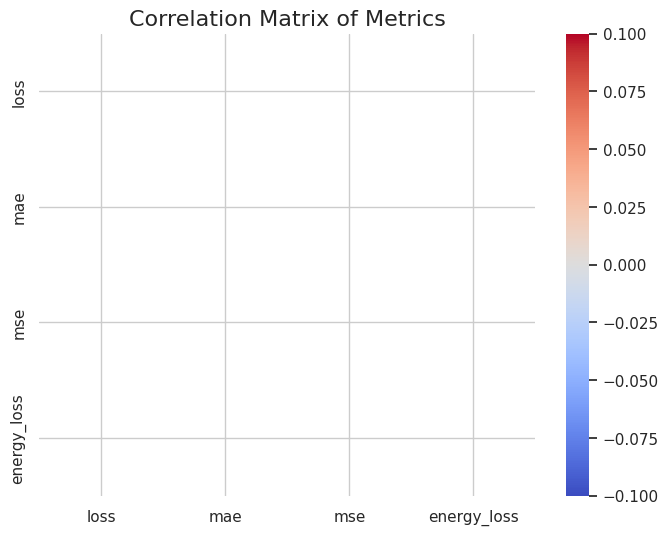

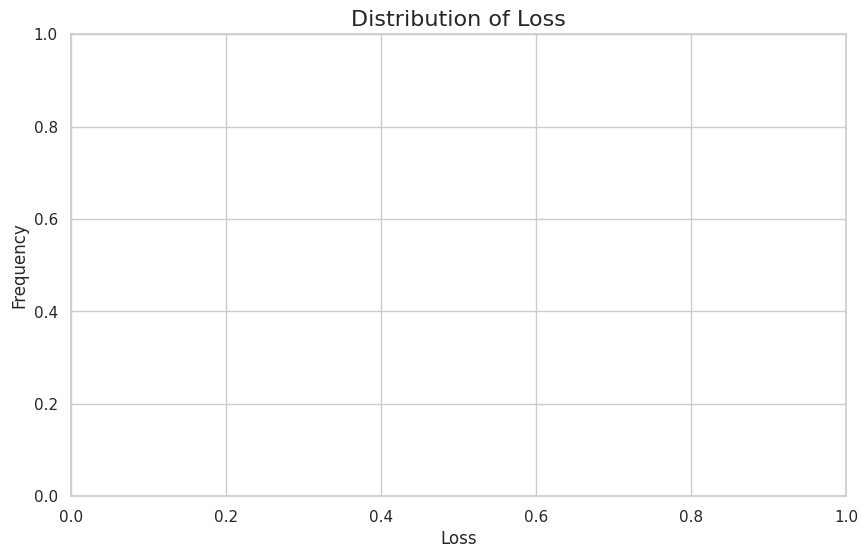

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/batch_train_log_lambda_0.5_datafrac_0.001.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_train_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.5_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.01/batch_train_log_lambda_0.1_datafrac_0.01.csv"

data = pd.read_csv(filepath)

# Check the first few rows of the dataset
display(data.head())

# Set the style for the plots
sns.set(style="whitegrid")


# Heatmap to visualize the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[["loss", "mae", "mse", "energy_loss"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics", fontsize=16)
plt.show()

# Histogram of Loss values
plt.figure(figsize=(10, 6))
sns.histplot(data["loss"], kde=True, color="blue", bins=20)
plt.title("Distribution of Loss", fontsize=16)
plt.xlabel("Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [19]:
data=data[data["mae"]<200]

/tmp/ipykernel_4071609/3900958726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']


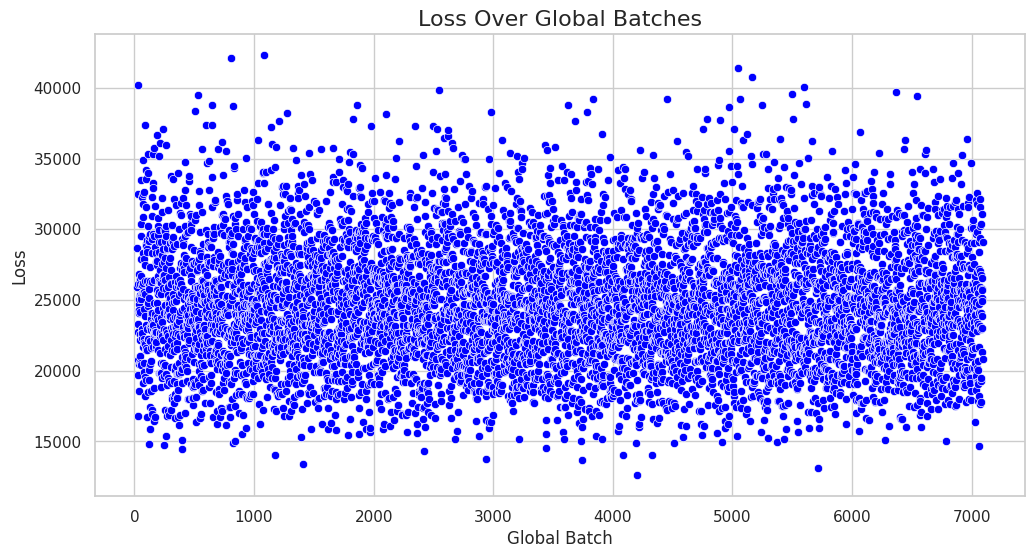

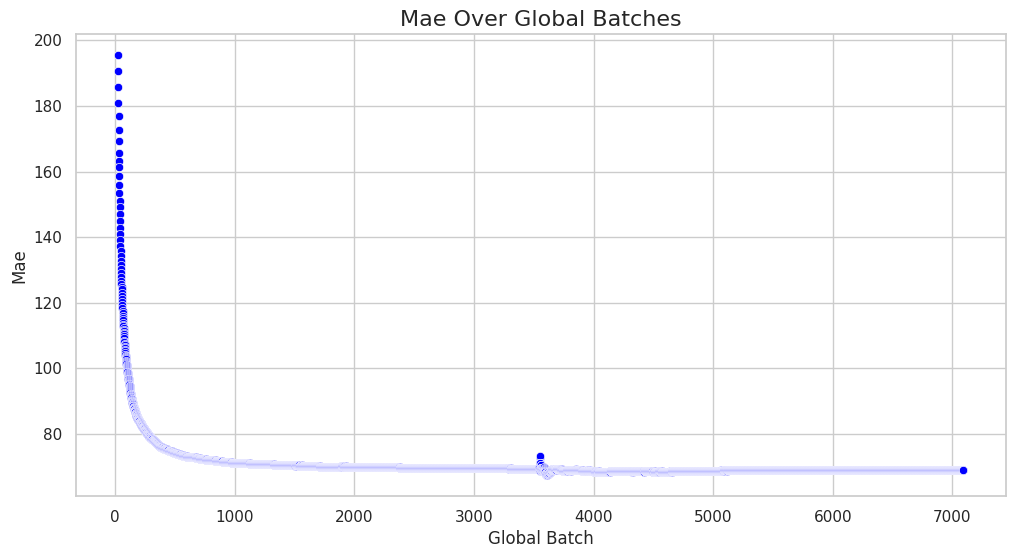

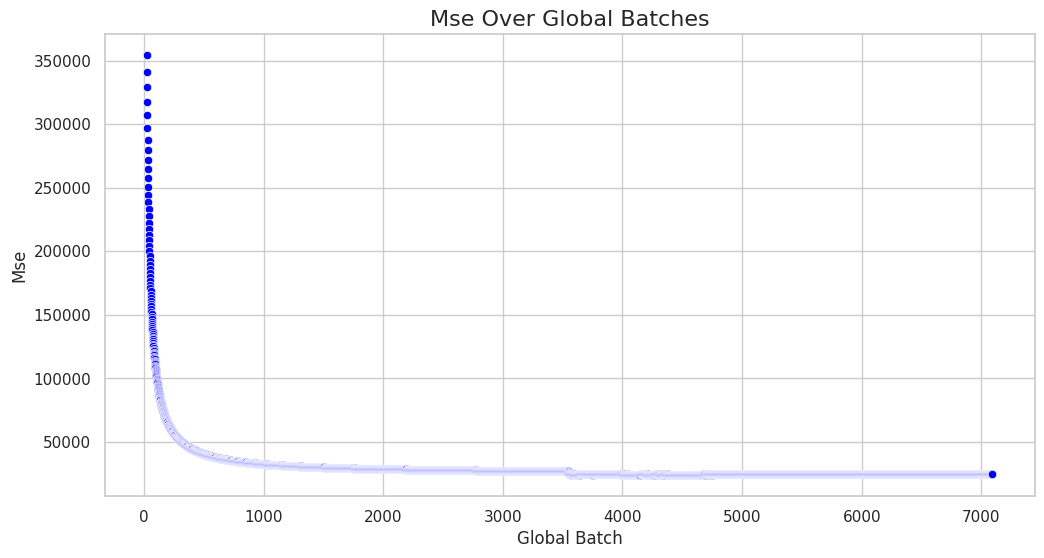

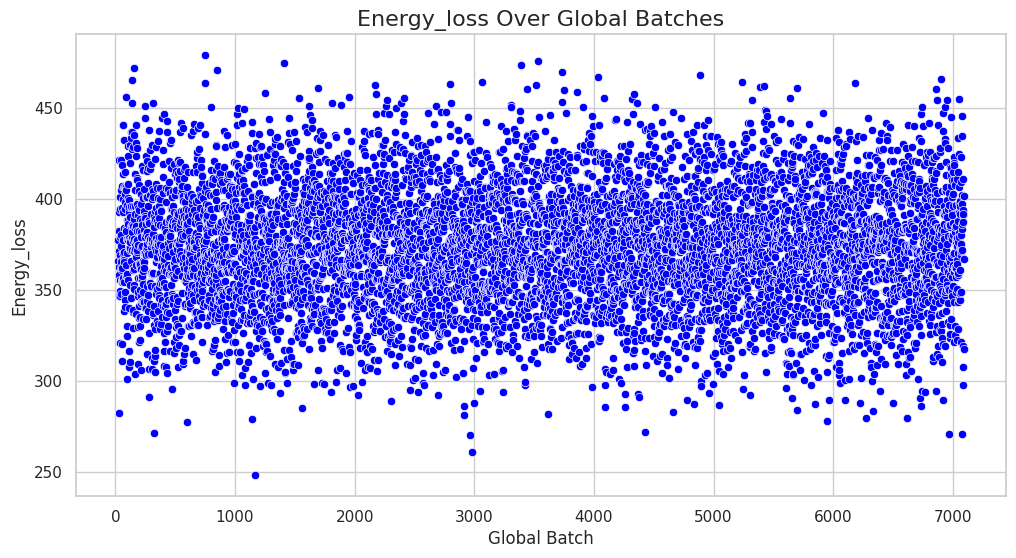

In [20]:
# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Plot metrics against the global batch index
metrics = ['loss', 'mae', 'mse', 'energy_loss']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue")
    plt.title(f"{metric.capitalize()} Over Global Batches", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.show()


# lambda 0.5

epoch  batch          loss         mae          mse  energy_loss
0      1      1  2.803667e+05  414.800476   280324.625   420.462860
1      1      2  2.555406e+06  660.594971  1417848.750   334.379150
2      1      3  4.737592e+06  911.632996  2524420.250   280.882690
3      1      4  2.757709e+04  702.057739  1900200.500   361.963318
4      1      5  3.370161e+04  585.262573  1526893.500   361.693787

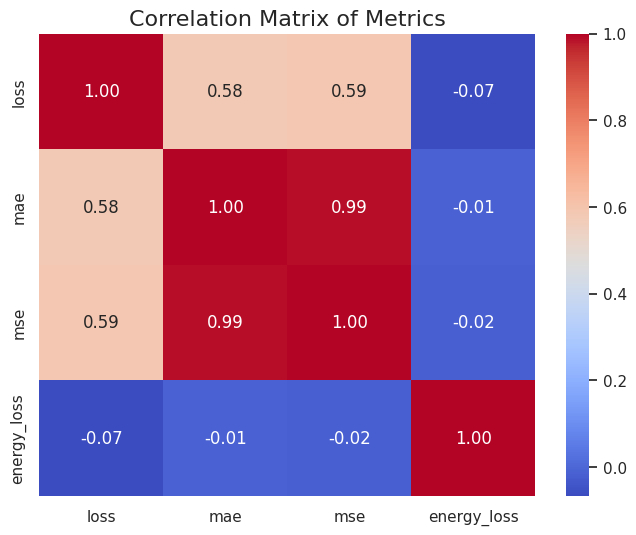

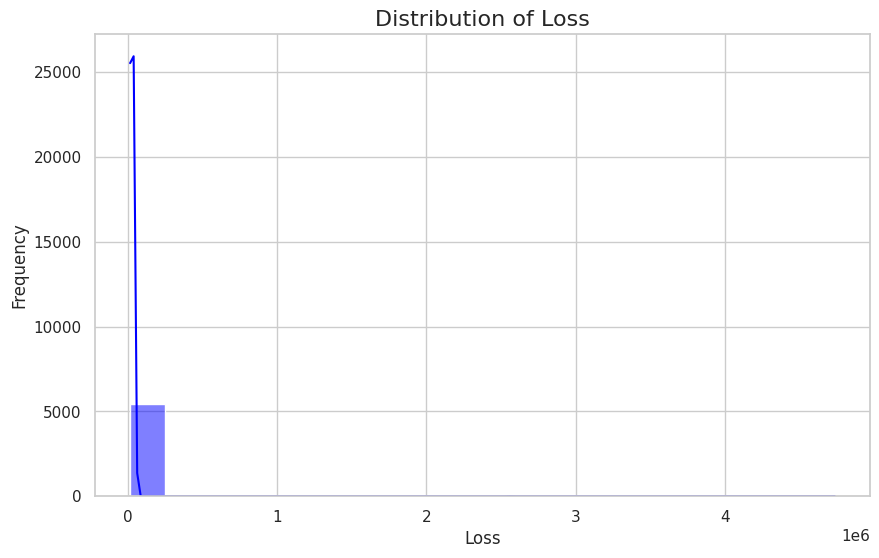

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/batch_train_log_lambda_0.5_datafrac_0.001.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_train_log_lambda_0.0_datafrac_0.1.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.0_datafrac_0.1.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.5_datafrac_0.1.csv"

data = pd.read_csv(filepath)

# Check the first few rows of the dataset
display(data.head())

# Set the style for the plots
sns.set(style="whitegrid")


# Heatmap to visualize the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[["loss", "mae", "mse", "energy_loss"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics", fontsize=16)
plt.show()

# Histogram of Loss values
plt.figure(figsize=(10, 6))
sns.histplot(data["loss"], kde=True, color="blue", bins=20)
plt.title("Distribution of Loss", fontsize=16)
plt.xlabel("Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


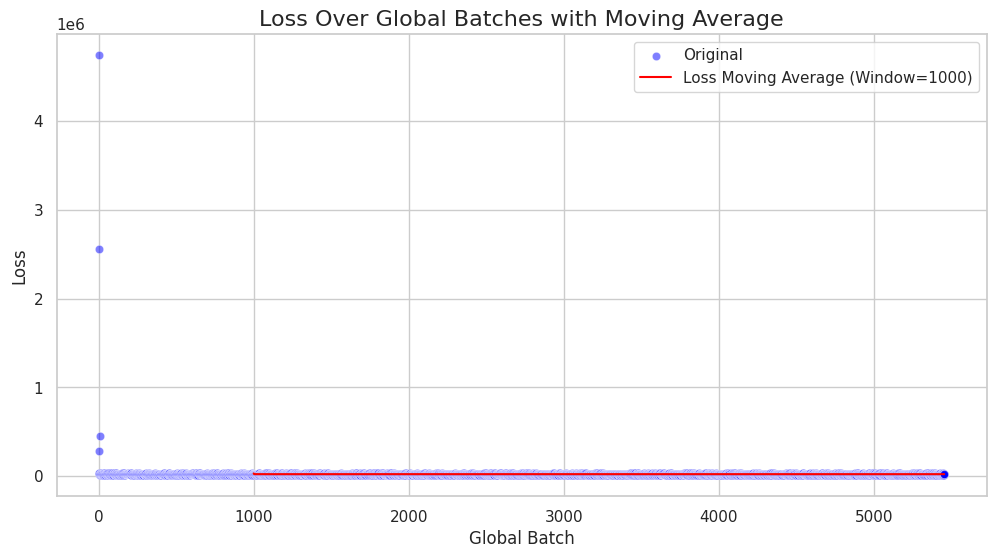

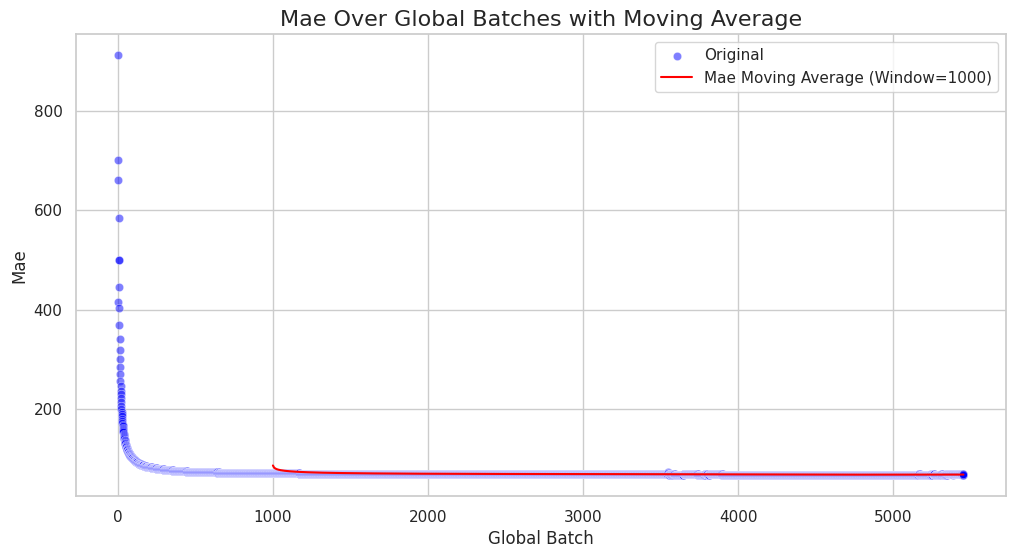

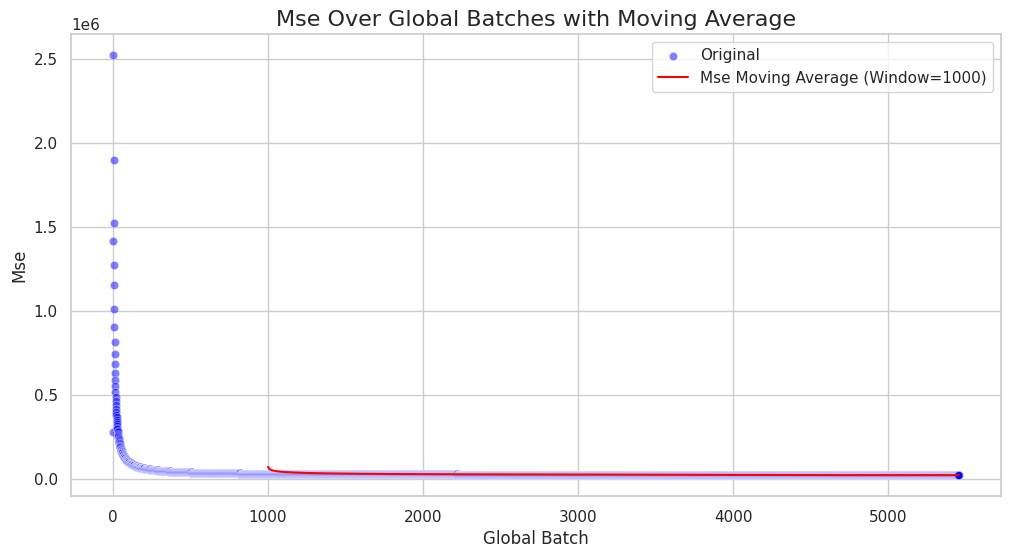

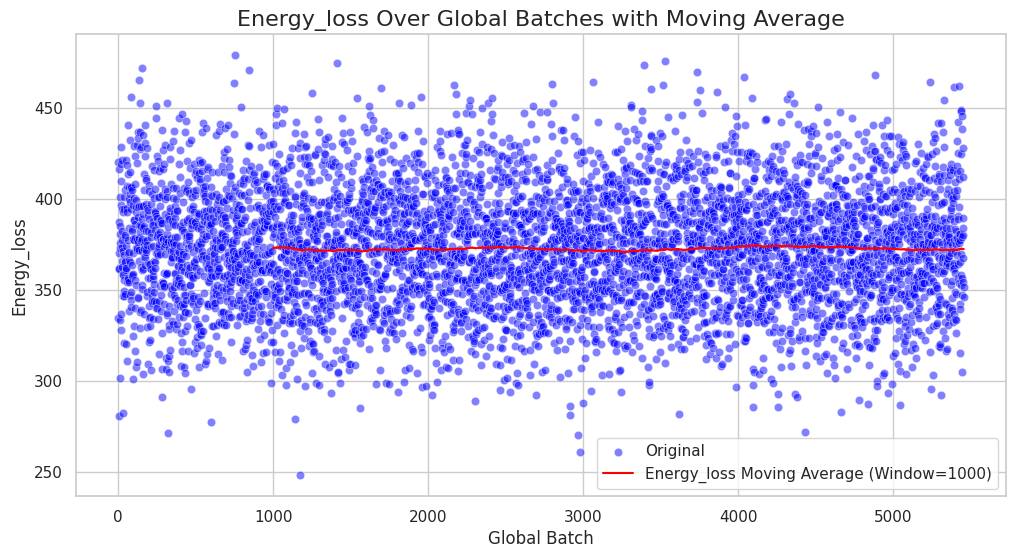

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `data` is a pandas DataFrame with 'epoch', 'batch', and the metrics columns like 'loss', 'mae', 'mse', 'energy_loss'

# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Define the metrics to plot
metrics = ['loss', 'mae', 'mse', 'energy_loss']
window_size = 1000  # Define the window size for the moving average

# Loop through each metric and plot with moving average
for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    # Compute the moving average for the metric with the rolling window
    data[f'{metric}_moving_avg'] = data[metric].rolling(window=window_size).mean()
    
    # Plot the original data (scatter)
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue", alpha=0.5, label='Original')
    
    # Plot the moving average (line)
    sns.lineplot(x="global_batch", y=f'{metric}_moving_avg', data=data, color="red", label=f'{metric.capitalize()} Moving Average (Window={window_size})')

    # Add title and labels
    plt.title(f"{metric.capitalize()} Over Global Batches with Moving Average", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()


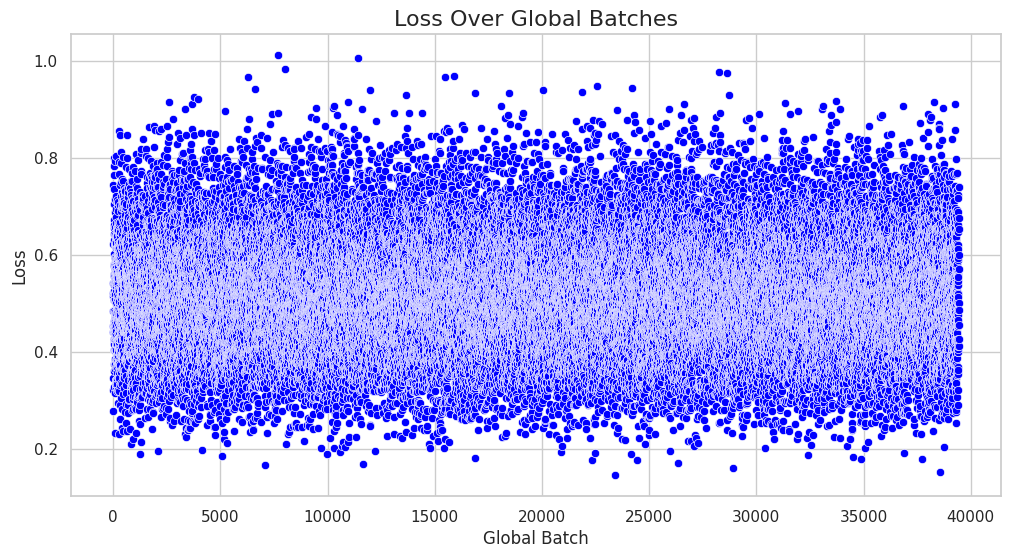

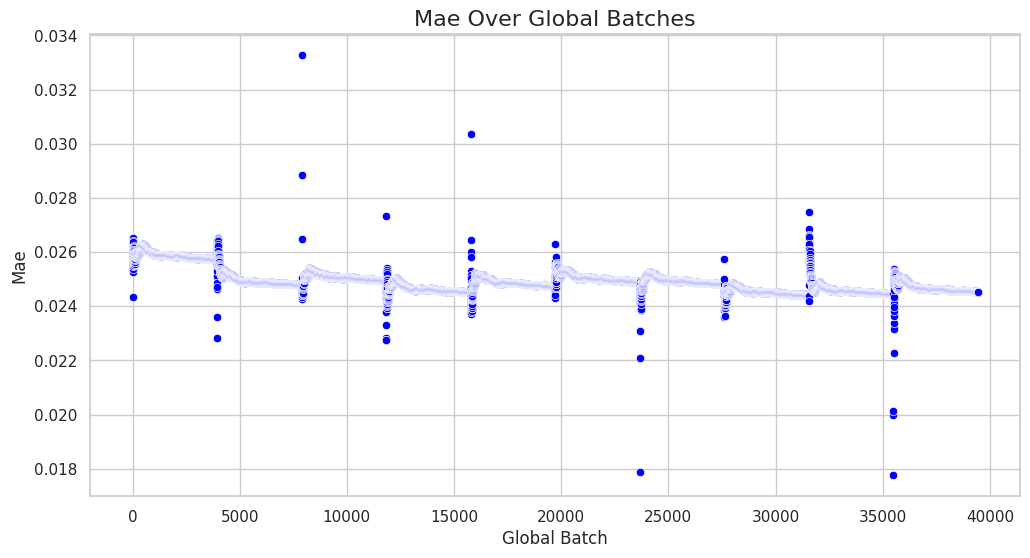

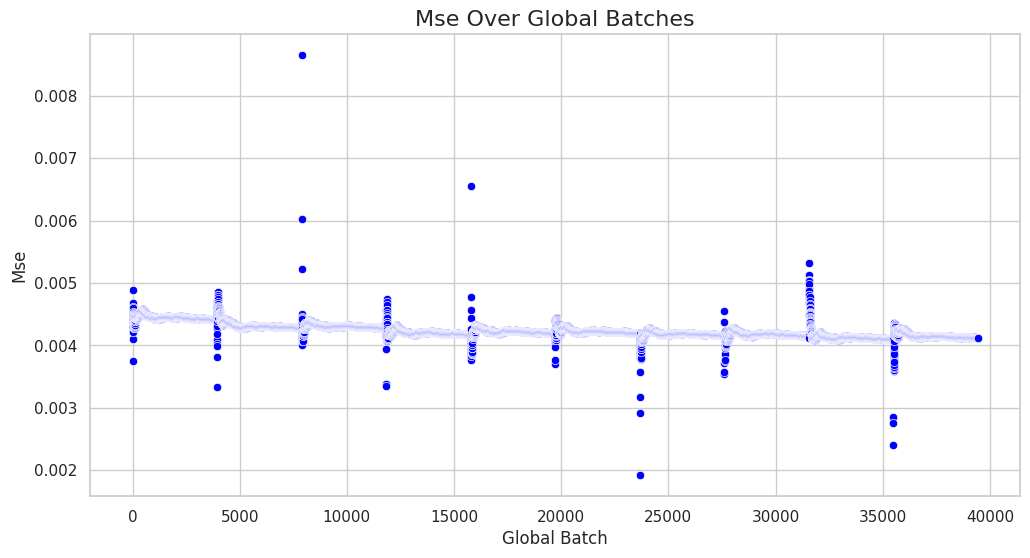

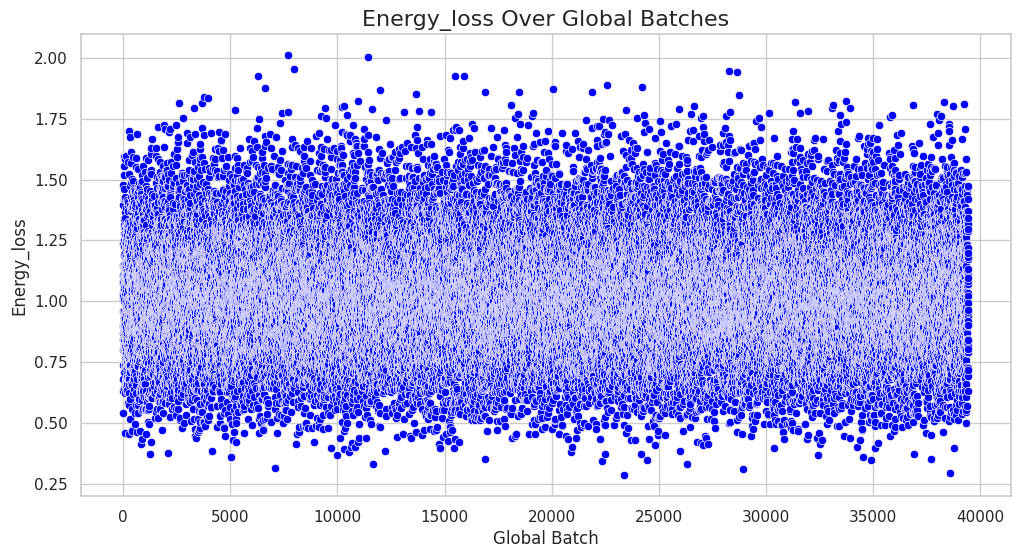

In [9]:
# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Plot metrics against the global batch index
metrics = ['loss', 'mae', 'mse', 'energy_loss']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue")
    plt.title(f"{metric.capitalize()} Over Global Batches", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.show()


# Plot per metric

In [14]:
data

Empty DataFrame
Columns: [epoch, batch, loss, mae, mse, energy_loss]
Index: []

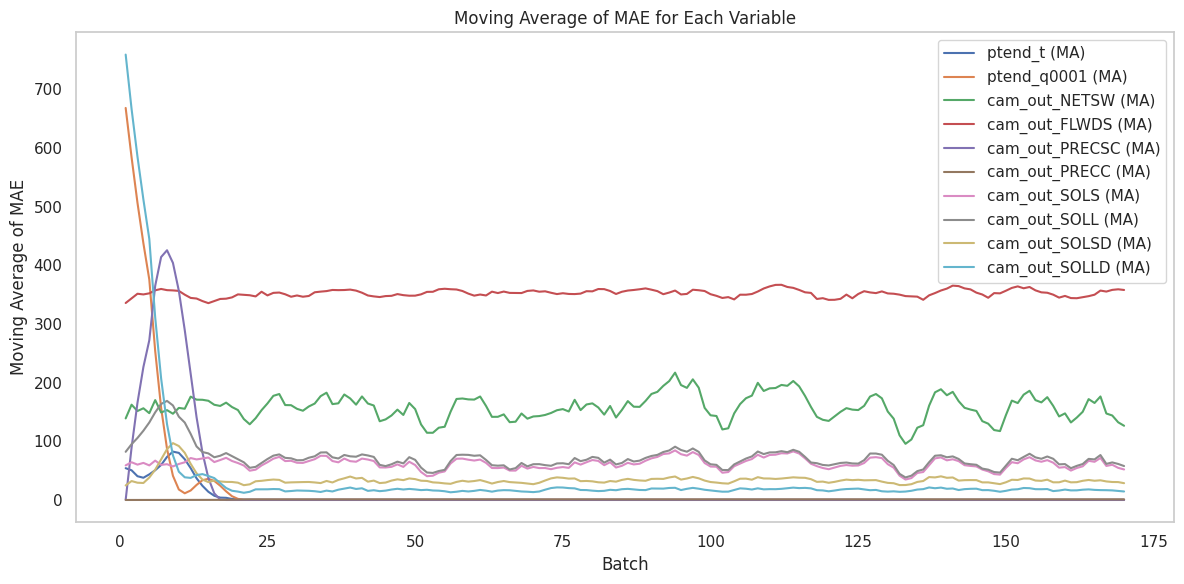

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/alvarovh/code/cse598_climate_proj/climate-physicsML/final_combined_loss_model/output_batch_size_32_learning_rate_0.00001_lambda_0.0/results_0.01/train_variable_metrics_lambda_0.0_datafrac_0.01.csv"  # Replace with the correct path to your file

data = pd.read_csv(file_path)

# Calculate the moving average
window_size = 5  # Adjust the window size for the moving average
data['mae_moving_avg'] = data.groupby('variable_name')['mae'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plot each variable's moving average
plt.figure(figsize=(12, 6))
for variable in data['variable_name'].unique():
    subset = data[data['variable_name'] == variable]
    plt.plot(subset['batch'], subset['mae_moving_avg'], label=f"{variable} (MA)")

# Customize the plot
plt.title("Moving Average of MAE for Each Variable")
plt.xlabel("Batch")
plt.ylabel("Moving Average of MAE")
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


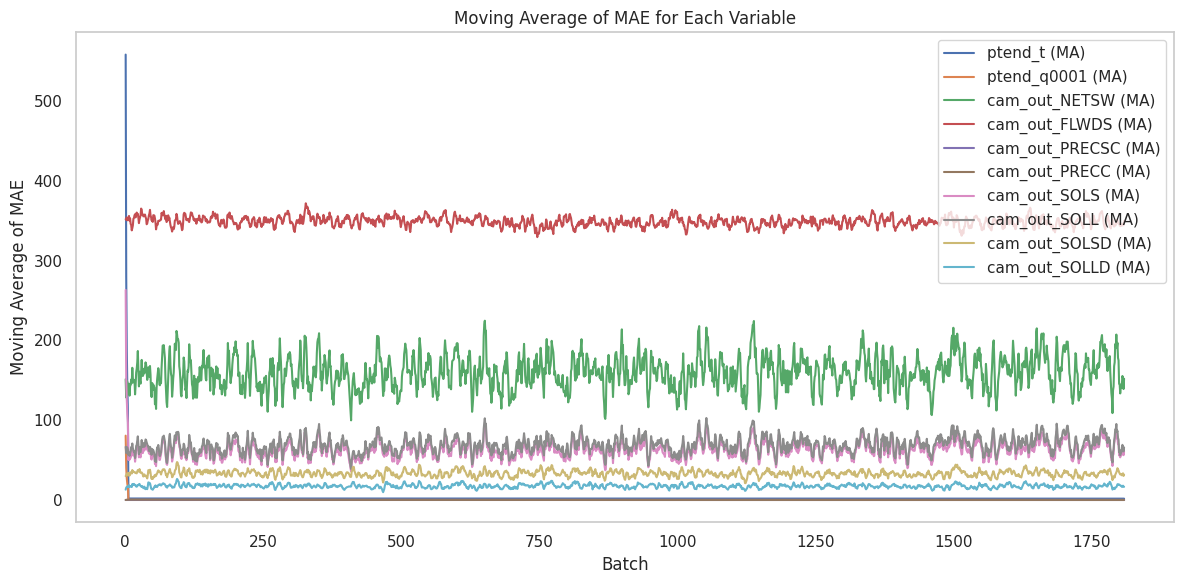

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/alvarovh/code/cse598_climate_proj/results/results_0.01/train_variable_metrics_lambda_0.1_datafrac_0.01.csv"  # Replace with the correct path to your file

data = pd.read_csv(file_path)

# Calculate the moving average
window_size = 5  # Adjust the window size for the moving average
data['mae_moving_avg'] = data.groupby('variable_name')['mae'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plot each variable's moving average
plt.figure(figsize=(12, 6))
for variable in data['variable_name'].unique():
    subset = data[data['variable_name'] == variable]
    plt.plot(subset['batch'], subset['mae_moving_avg'], label=f"{variable} (MA)")

# Customize the plot
plt.title("Moving Average of MAE for Each Variable")
plt.xlabel("Batch")
plt.ylabel("Moving Average of MAE")
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


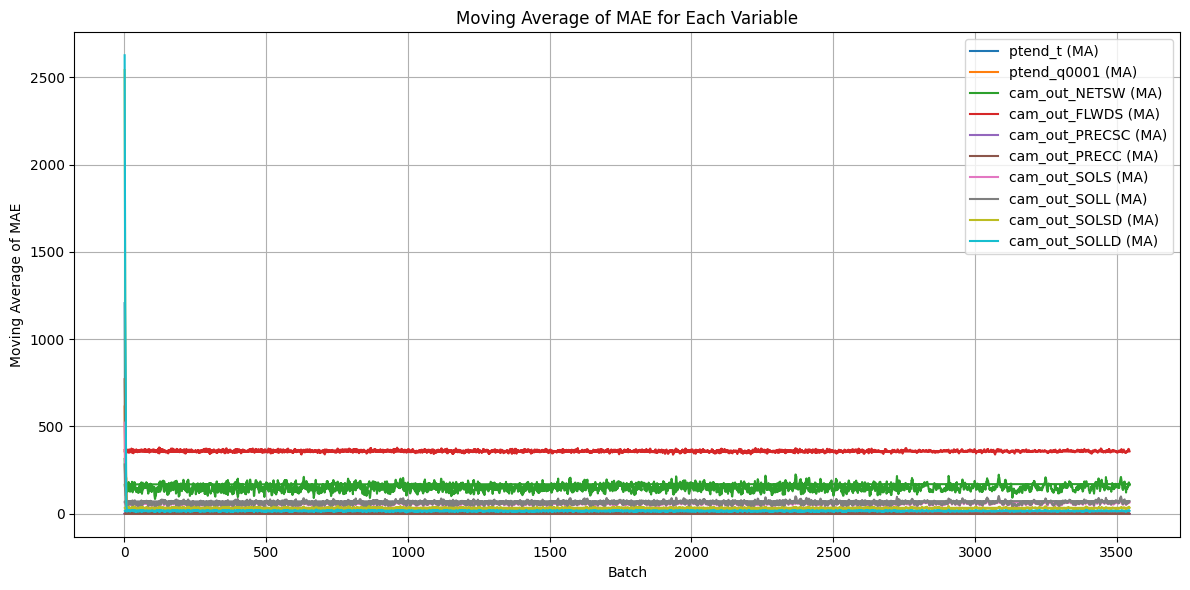

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/alvarovh/code/cse598_climate_proj/results/results_0.01/train_variable_metrics_lambda_0.1_datafrac_0.01.csv"  # Replace with the correct path to your file

data = pd.read_csv(file_path)

# Calculate the moving average
window_size = 5  # Adjust the window size for the moving average
data['mae_moving_avg'] = data.groupby('variable_name')['mae'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plot each variable's moving average
plt.figure(figsize=(12, 6))
for variable in data['variable_name'].unique():
    subset = data[data['variable_name'] == variable]
    plt.plot(subset['batch'], subset['mae_moving_avg'], label=f"{variable} (MA)")

# Customize the plot
plt.title("Moving Average of MAE for Each Variable")
plt.xlabel("Batch")
plt.ylabel("Moving Average of MAE")
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


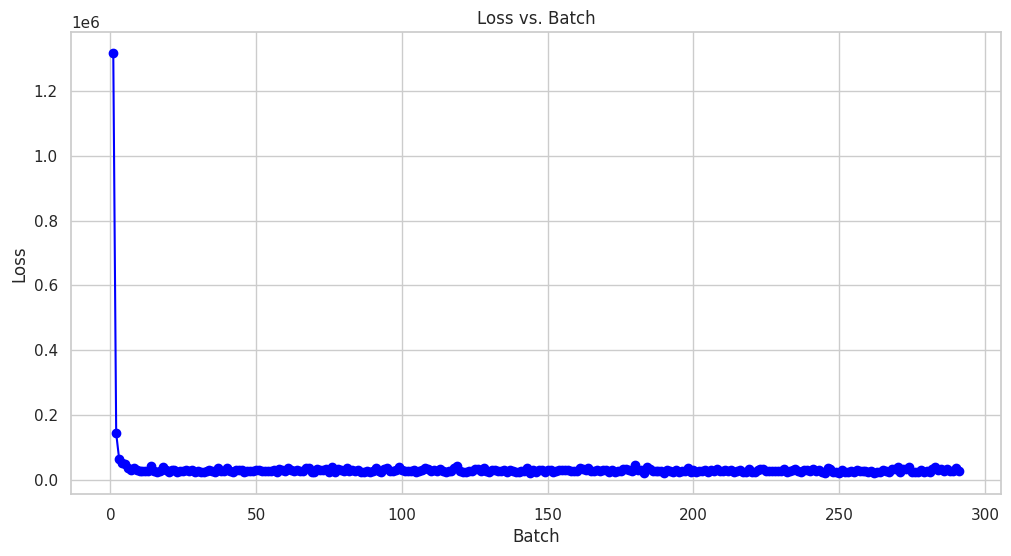

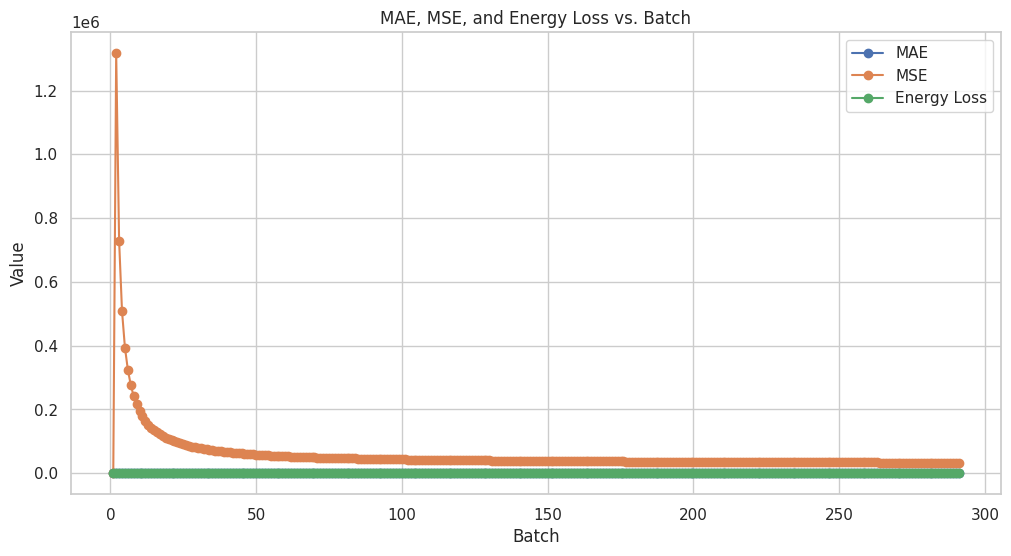

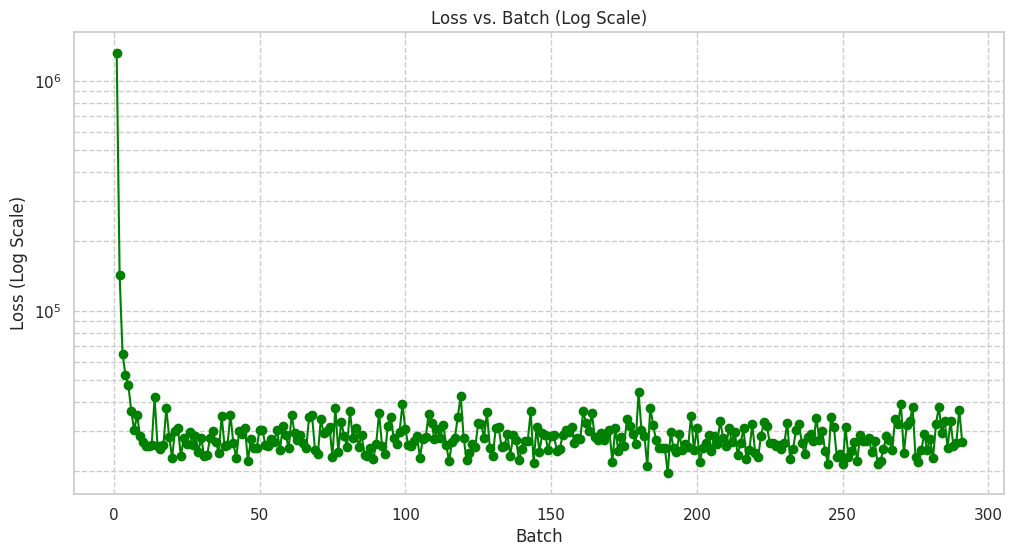

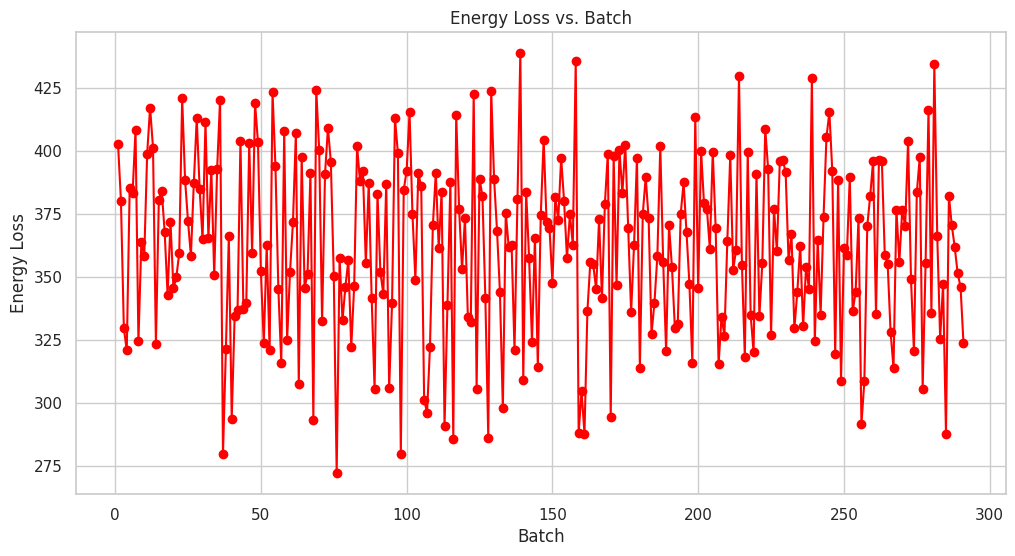

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.1_datafrac_0.01.csv')

# Plot 'loss' vs 'batch'
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['loss'], marker='o', linestyle='-', color='blue')
plt.title('Loss vs. Batch')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot 'mae', 'mse', and 'energy_loss' vs 'batch' in a single graph
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['mae'], marker='o', linestyle='-', label='MAE')
plt.plot(df['batch'], df['mse'], marker='o', linestyle='-', label='MSE')
plt.plot(df['batch'], df['energy_loss'], marker='o', linestyle='-', label='Energy Loss')
plt.title('MAE, MSE, and Energy Loss vs. Batch')
plt.xlabel('Batch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# If you want to plot 'loss' on a logarithmic scale due to high variance
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['loss'], marker='o', linestyle='-', color='green')
plt.yscale('log')
plt.title('Loss vs. Batch (Log Scale)')
plt.xlabel('Batch')
plt.ylabel('Loss (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

# only the energy loss
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['energy_loss'], marker='o', linestyle='-', color='red')
plt.title('Energy Loss vs. Batch')
plt.xlabel('Batch')
plt.ylabel('Energy Loss')
plt.grid(True)
plt.show()

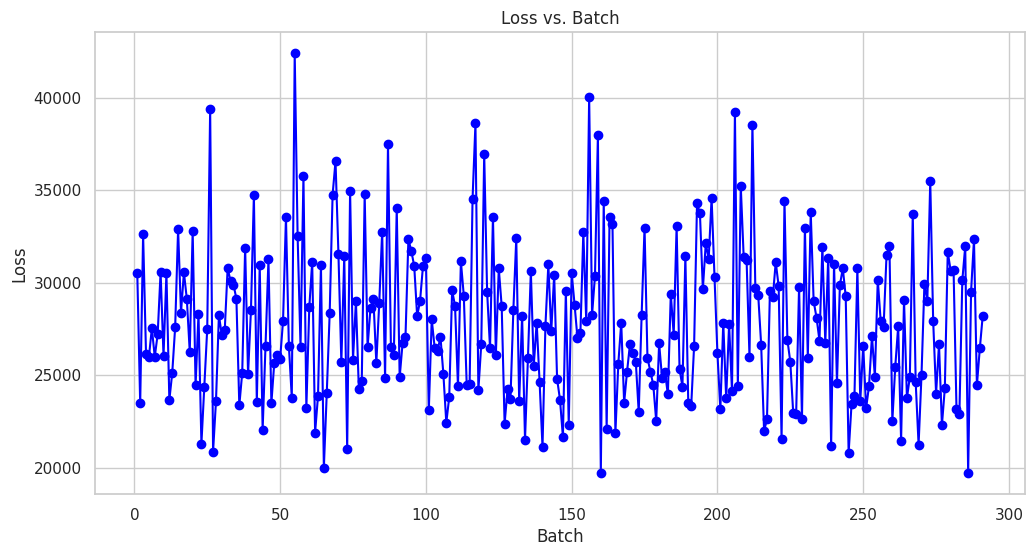

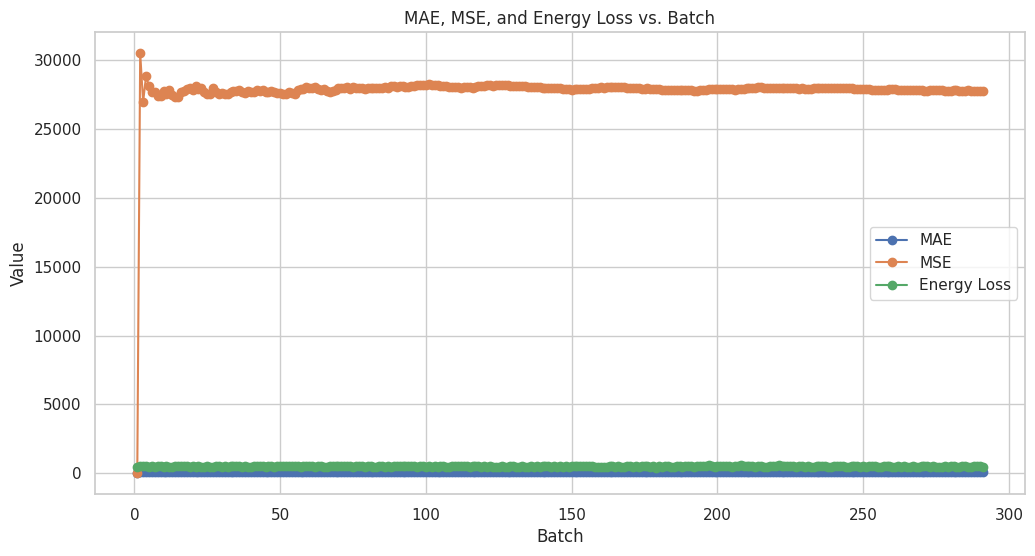

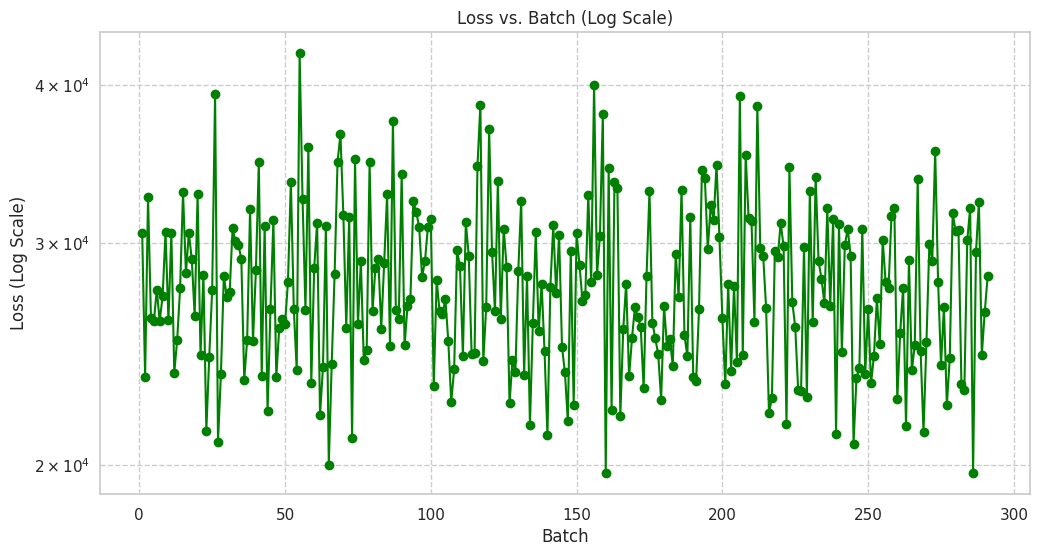

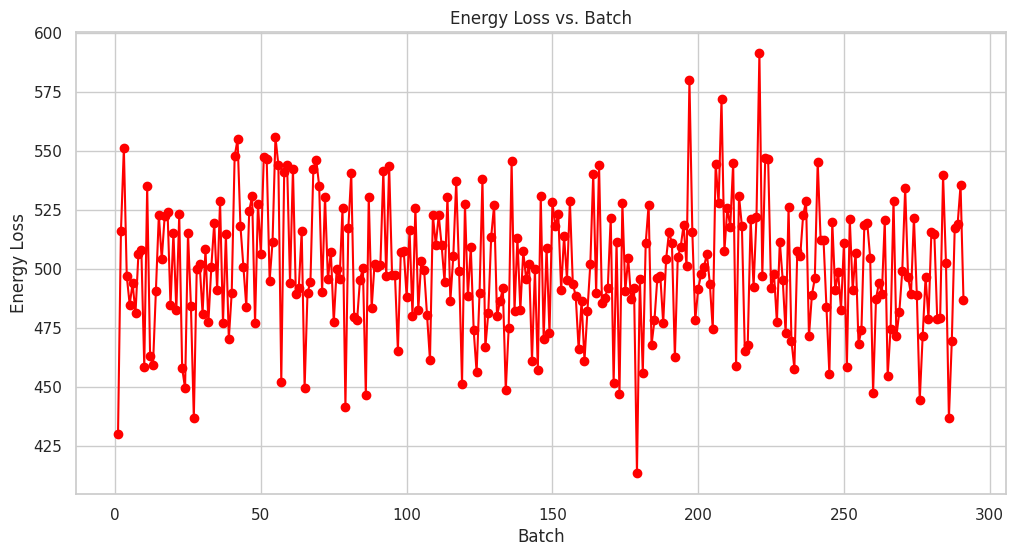

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.1_datafrac_0.01.csv')

# Plot 'loss' vs 'batch'
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['loss'], marker='o', linestyle='-', color='blue')
plt.title('Loss vs. Batch')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot 'mae', 'mse', and 'energy_loss' vs 'batch' in a single graph
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['mae'], marker='o', linestyle='-', label='MAE')
plt.plot(df['batch'], df['mse'], marker='o', linestyle='-', label='MSE')
plt.plot(df['batch'], df['energy_loss'], marker='o', linestyle='-', label='Energy Loss')
plt.title('MAE, MSE, and Energy Loss vs. Batch')
plt.xlabel('Batch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# If you want to plot 'loss' on a logarithmic scale due to high variance
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['loss'], marker='o', linestyle='-', color='green')
plt.yscale('log')
plt.title('Loss vs. Batch (Log Scale)')
plt.xlabel('Batch')
plt.ylabel('Loss (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

# only the energy loss
plt.figure(figsize=(12, 6))
plt.plot(df['batch'], df['energy_loss'], marker='o', linestyle='-', color='red')
plt.title('Energy Loss vs. Batch')
plt.xlabel('Batch')
plt.ylabel('Energy Loss')
plt.grid(True)
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(batch_csv_filepath):
    """
    Plot the metrics (loss, MAE, MSE, energy loss) against the batch index from the CSV file.

    Args:

    batch_csv_filepath (str): The file path to the CSV file containing the batch-wise metrics.

    Returns:

    None: The function displays the plots but does not return any value.

    """

    # Read the data from the CSV file
    df = pd.read_csv(batch_csv_filepath)

    # Define plot settings
    plot_settings = {
        'Loss vs. Batch': {'column': 'loss', 'color': 'blue', 'ylabel': 'Loss'},
        'MAE vs. Batch': {'column': 'mae', 'color': 'orange', 'ylabel': 'Mean Absolute Error (MAE)'},
        'MSE vs. Batch': {'column': 'mse', 'color': 'green', 'ylabel': 'Mean Squared Error (MSE)'},
        'Energy Loss vs. Batch': {'column': 'energy_loss', 'color': 'red', 'ylabel': 'Energy Loss'},
    }

    # Create individual plots
    for title, settings in plot_settings.items():
        plt.figure(figsize=(8, 4))  # Adjusted size for smaller plots
        plt.plot(df['batch'], df[settings['column']], marker='o', linestyle='-', color=settings['color'])
        plt.title(title)
        plt.xlabel('Batch')
        plt.ylabel(settings['ylabel'])
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Optional: Loss on logarithmic scale
    plt.figure(figsize=(8, 4))
    plt.plot(df['batch'], df['loss'], marker='o', linestyle='-', color='purple')
    plt.yscale('log')
    plt.title('Loss vs. Batch (Log Scale)')
    plt.xlabel('Batch')
    plt.ylabel('Loss (Log Scale)')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()


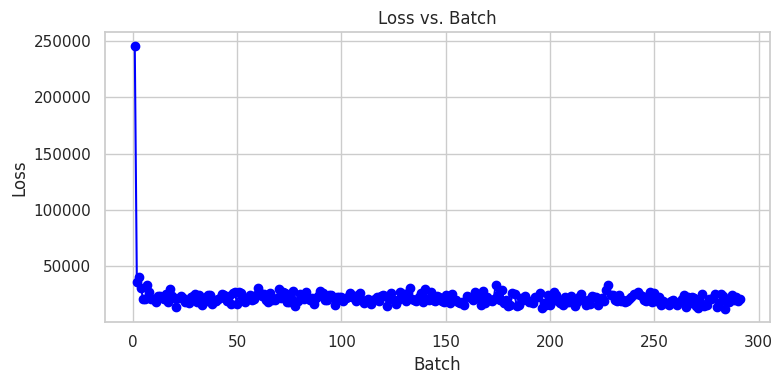

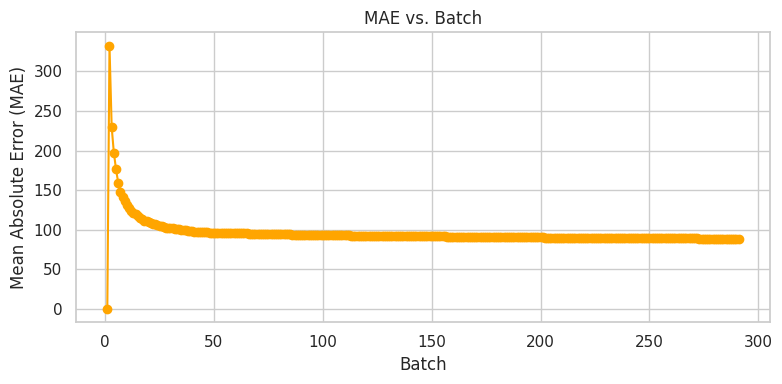

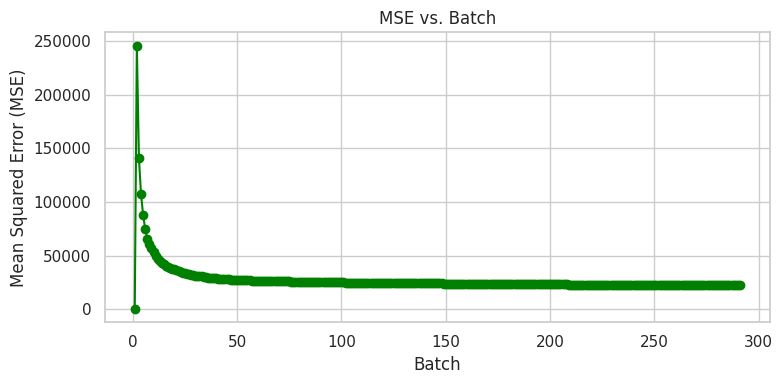

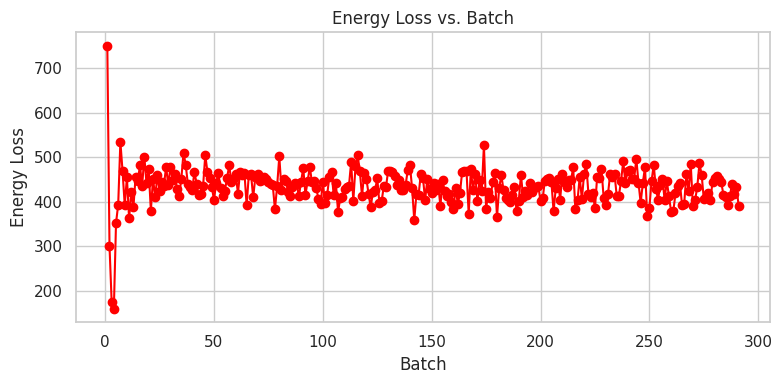

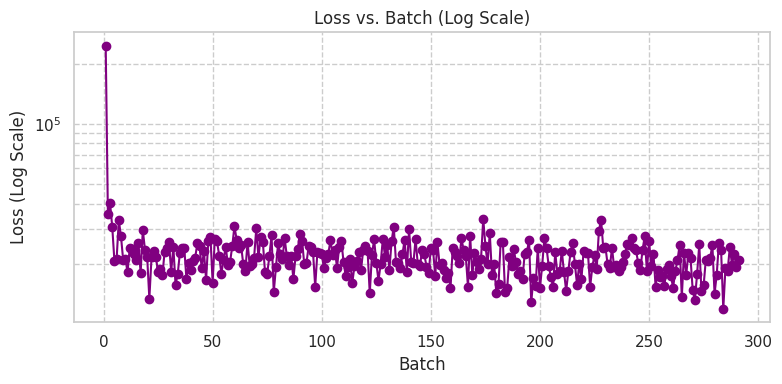

In [26]:
plot_metrics('/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.0_datafrac_0.01.csv')

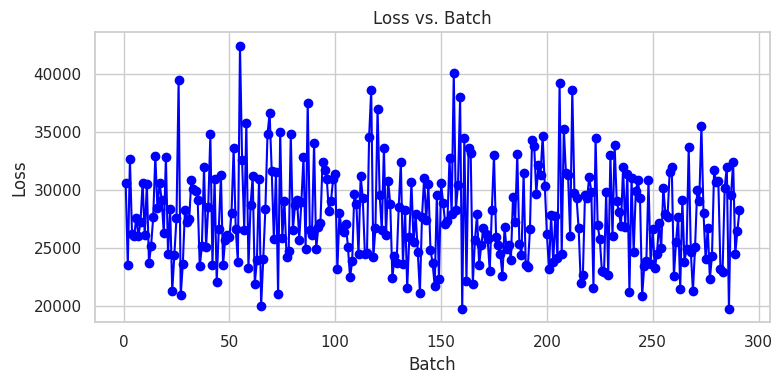

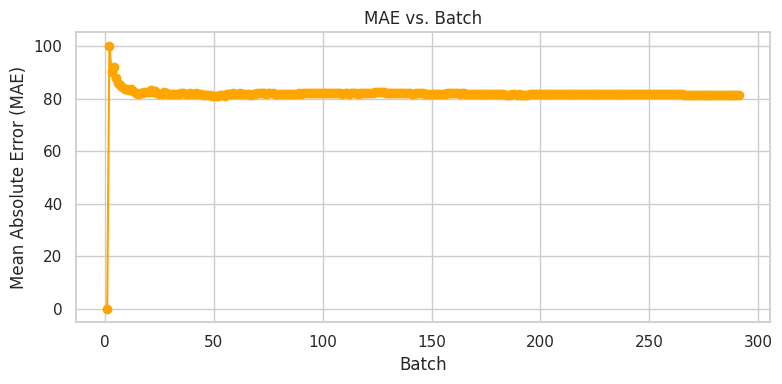

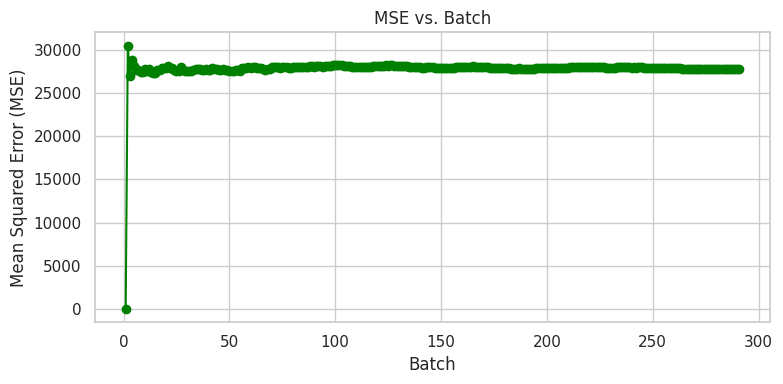

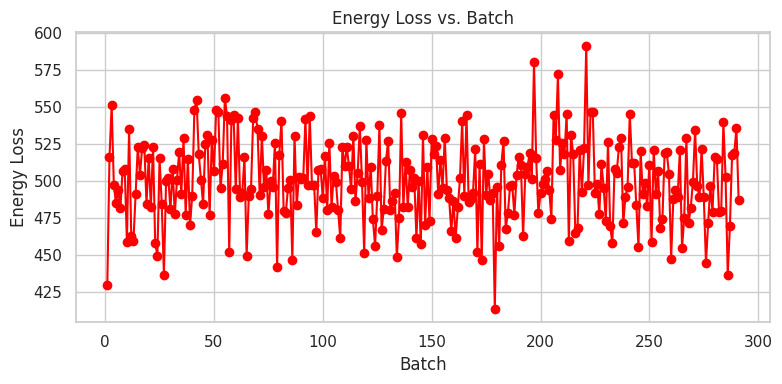

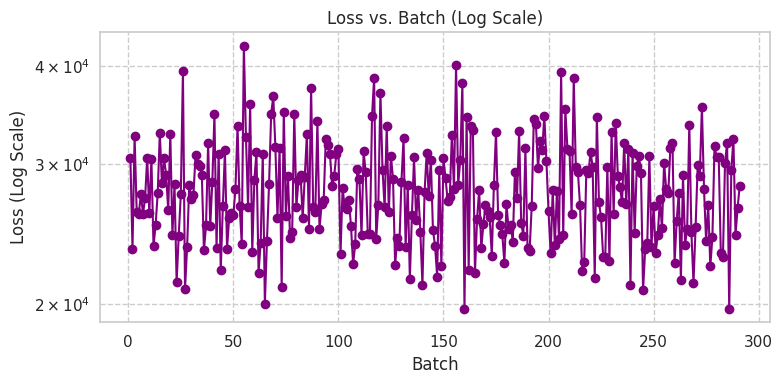

In [25]:
plot_metrics('/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.1_datafrac_0.01.csv')

In [3]:
import glob, os

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def compare_models_metrics(model_csv_paths, y_limits=None):
#     """
#     Compare metrics (loss, MAE, MSE, energy loss) across multiple models using subplots.

#     Args:
#         model_csv_paths (list of str): List of file paths to the CSV files containing the batch-wise metrics.
#         y_limits (dict): Optional dictionary specifying y-axis limits for each metric.
#                          Format: {'loss': (min, max), 'mae': (min, max), ...}
#     Returns:
#         None: The function displays the plots but does not return any value.
#     """
#     # Define plot settings
#     metrics = ['loss', 'mae', 'mse', 'energy_loss']
#     titles = ['Loss', 'MAE', 'MSE', 'Energy Loss']
#     colors = ['blue', 'orange', 'green', 'red']

#     # Prepare subplots
#     fig, axs = plt.subplots(len(metrics), len(model_csv_paths), figsize=(15, 10), sharey='row')
#     fig.suptitle('Comparison of Metrics Across Models', fontsize=16)

#     for col, filepath in enumerate(model_csv_paths):
#         # Read the data from the CSV file
#         df = pd.read_csv(filepath)

#         for row, metric in enumerate(metrics):
#             ax = axs[row, col] if len(metrics) > 1 else axs[col]
#             ax.plot(df['batch'], df[metric], marker='o', linestyle='-', color=colors[row])
#             ax.set_title(f'Model {col + 1}' if row == 0 else '', fontsize=10)
#             ax.set_xlabel('Batch' if row == len(metrics) - 1 else '')
#             ax.set_ylabel(titles[row] if col == 0 else '')

#             # Set y-axis limits if provided
#             if y_limits and metric in y_limits:
#                 ax.set_ylim(y_limits[metric])

#             ax.grid(True)

#     plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
#     plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_models_metrics(model_csv_paths, model_labels=None, y_limits=None):
    """
    Compare metrics (loss, MAE, MSE, energy loss) across multiple models using subplots.

    Args:
        model_csv_paths (list of str): List of file paths to the CSV files containing the batch-wise metrics.
        y_limits (dict): Optional dictionary specifying y-axis limits for each metric.
                         Format: {'loss': (min, max), 'mae': (min, max), ...}
    Returns:
        None: The function displays the plots but does not return any value.
    """
    # Define plot settings
    metrics = ['loss', 'mae', 'mse', 'energy_loss']
    titles = ['Loss', 'MAE', 'MSE', 'Energy Loss']
    colors = ['blue', 'orange', 'green', 'red']

    # Prepare subplots
    num_models = len(model_csv_paths)
    fig, axs = plt.subplots(len(metrics), num_models, figsize=(15, 10), sharey='row')
    fig.suptitle('Comparison of Metrics Across Models', fontsize=16)

    # Loop through models and metrics to populate subplots
    for col, filepath in enumerate(model_csv_paths):
        # Extract model identifier from file path (optional: customize as needed)
        # model_label = model_labels[col] if model_labels else f"Model {col + 1}"

        # Read the data from the CSV file
        df = pd.read_csv(filepath)

        for row, metric in enumerate(metrics):
            # eliminate 10% max values
            df = df[df[metric] < df[metric].quantile(0.9)]


            ax = axs[row, col] if len(metrics) > 1 else axs[col]
            ax.plot(df['batch'], df[metric], marker='o', linestyle='-', color=colors[row])
            # ax.set_title(model_label if row == 0 else '', fontsize=10)
            ax.set_xlabel('Batch' if row == len(metrics) - 1 else '')
            ax.set_ylabel(titles[row] if col == 0 else '')

            # Set y-axis limits if provided
            if y_limits and metric in y_limits:
                ax.set_ylim(y_limits[metric])

            ax.grid(True)

    # Add column labels (shared for all rows in the same column)
    for col, filepath in enumerate(model_csv_paths):
        model_label = model_labels[col] if model_labels else f"Model {col + 1}"
        axs[0, col].annotate(
            model_label, xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=12, fontweight='bold'
        )

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
    plt.show()


In [39]:
def prepare_per_variable_metrics(file_path):
    # Read the data from the CSV file
    df = pd.read_csv(file_path)
    df = df[df["variable_name"]=="state_t"]
    df["MSE_of_state_t"] = df["mse"]
    df["MAE_of_state_t"] = df["mae"]
    df = df[["epoch","batch", "MSE_of_state_t", "MAE_of_state_t"]]
    return df


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_models_metrics(model_csv_paths, per_variable_metrics_csv_paths, model_labels=None, y_limits=None):
    """
    Compare metrics (loss, MAE, MSE, energy loss) across multiple models using subplots.

    Args:
        model_csv_paths (list of str): List of file paths to the CSV files containing the batch-wise metrics.
        y_limits (dict): Optional dictionary specifying y-axis limits for each metric.
                         Format: {'loss': (min, max), 'mae': (min, max), ...}
    Returns:
        None: The function displays the plots but does not return any value.
    """
    # Define plot settings
    metrics = ['loss', 'mae', 'mse', 'energy_loss', 'MSE_of_state_t', 'MAE_of_state_t']
    titles = ['Loss', 'MAE', 'MSE', 'Energy Loss', 'MSE of state_t', 'MAE of state_t']
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

    # Prepare subplots
    num_models = len(model_csv_paths)
    assert len(per_variable_metrics_csv_paths) == num_models, "Number of models and per-variable metrics CSVs do not match"
    assert len(model_labels) == num_models, "Number of models and model labels do not match"

    fig, axs = plt.subplots(len(metrics), num_models, figsize=(15, 10), sharey='row')
    fig.suptitle('Comparison of Metrics Across Models', fontsize=16)

    # Loop through models and metrics to populate subplots
    for col, batch_csv_path in enumerate(model_csv_paths):
        # Extract model identifier from file path (optional: customize as needed)
        # model_label = model_labels[col] if model_labels else f"Model {col + 1}"

        # Read the data from the CSV file
        df = pd.read_csv(batch_csv_path)

        df_per_variable = prepare_per_variable_metrics(per_variable_metrics_csv_paths[col])

        # merge by epoch and batch
        df = pd.merge(df, df_per_variable, on=["epoch", "batch"], how="inner")
        print(df.head())

        for row, metric in enumerate(metrics):
            # eliminate 10% max values
            df = df[df[metric] < df[metric].quantile(0.9)]


            ax = axs[row, col] if len(metrics) > 1 else axs[col]
            ax.plot(df['batch'], df[metric], marker='o', linestyle='-', color=colors[row])
            # ax.set_title(model_label if row == 0 else '', fontsize=10)
            ax.set_xlabel('Batch' if row == len(metrics) - 1 else '')
            ax.set_ylabel(titles[row] if col == 0 else '')

            # Set y-axis limits if provided
            if y_limits and metric in y_limits:
                ax.set_ylim(y_limits[metric])

            ax.grid(True)
    # Add column labels (shared for all rows in the same column)
    for col, filepath in enumerate(model_csv_paths):
        model_label = model_labels[col] if model_labels else f"Model {col + 1}"
        axs[0, col].annotate(
            model_label, xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=12, fontweight='bold'
        )

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
    plt.show()


In [36]:
# /home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_val_log_lambda_0.04_datafrac_0.01.csv
batch_logs_paths = glob.glob("/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_*csv")
pervariable_logs_paths = glob.glob("/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/train_variable_metrics_lambda_*.csv")
# paths = glob.glob("/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_val_log_lambda_*csv")




In [37]:
# order the paths and lambdas

batch_logs_paths = sorted(batch_logs_paths, key=lambda x: float(x.split("lambda_")[1].split("_")[0]))
pervariable_logs_paths = sorted(pervariable_logs_paths, key=lambda x: float(x.split("lambda_")[1].split("_")[0]))
lambdas = [float(os.path.basename(path).split("_")[-3]) for path in batch_logs_paths]



   epoch  batch           loss         mae           mse  energy_loss  \
0      1      1  179754.968750    0.000000       0.00000  1124.299561   
1      1      2  136750.546875  274.458832  179754.96875   204.352341   
2      1      3   37296.785156  237.654587  158252.75000   123.141998   
3      1      4   40201.085938  197.853149  117934.09375   103.116562   
4      1      5   21508.921875  180.512283   98500.84375   163.389786   

   MSE_of_state_t  MAE_of_state_t  
0   251658.562500      500.544067  
1    13552.972656      115.505280  
2    47095.593750      216.712189  
3    66686.718750      257.968719  
4    46544.617188      215.274017  
   epoch  batch           loss         mae            mse  energy_loss  \
0      1      1  176876.671875    0.000000       0.000000   112.848724   
1      1      2   28482.654297  263.911316  176875.546875   193.874084   
2      1      3   61393.589844  181.973953  102678.132812   659.649902   
3      1      4   46046.425781  172.003006   8891

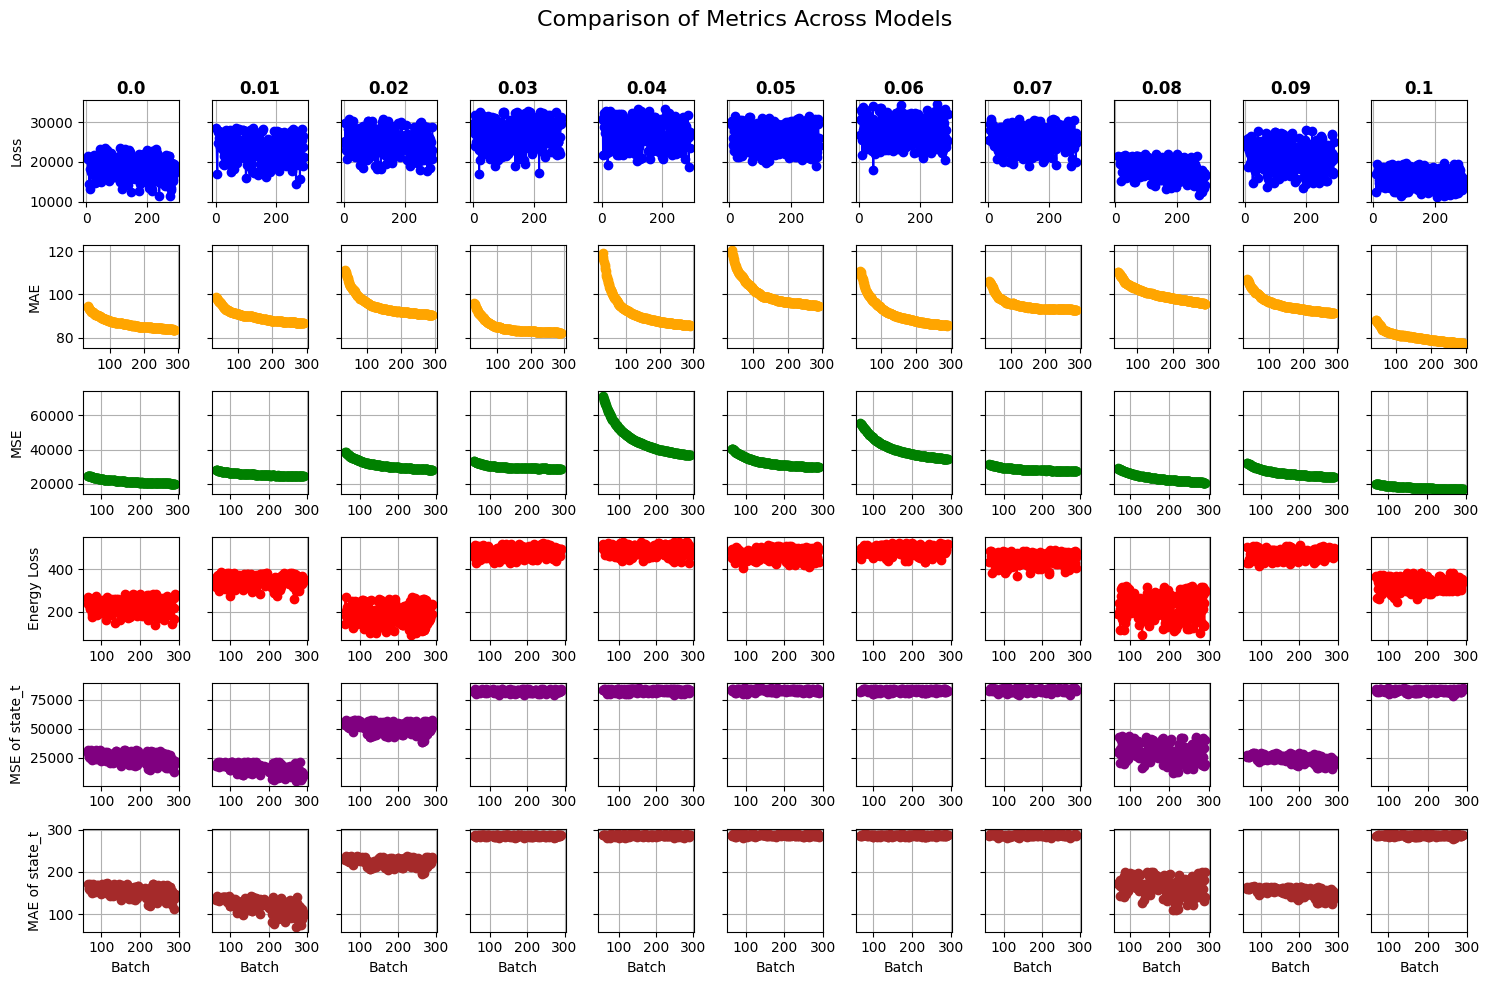

In [43]:
compare_models_metrics(batch_logs_paths,pervariable_logs_paths, model_labels=lambdas)

In [38]:
batch_logs_paths, pervariable_logs_paths, lambdas

(['/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.0_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.01_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.02_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.03_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.04_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.05_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.06_datafrac_0.01.csv',
  '/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/batch_train_log_lambda_0.07_datafrac_0.01.csv',
  '/home/alvarovh/code/cs

In [ ]:
compare_models_metrics(batch_logs_paths,pervariable_logs_paths, model_labels=lambdas)

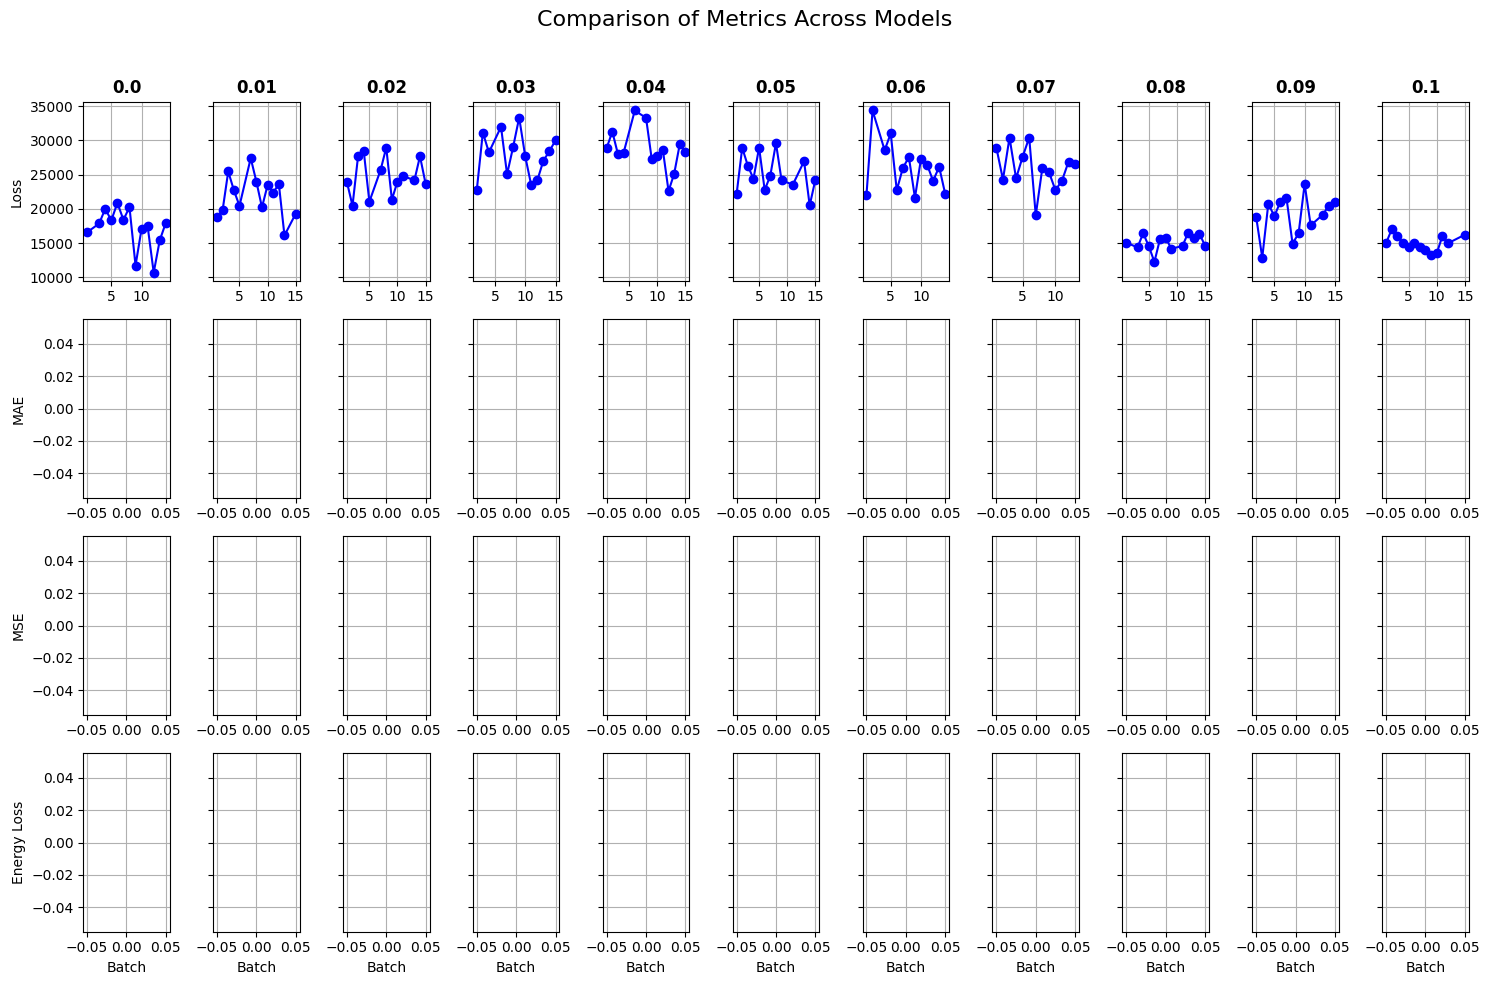

In [30]:
compare_models_metrics(paths, model_labels=lambdas)

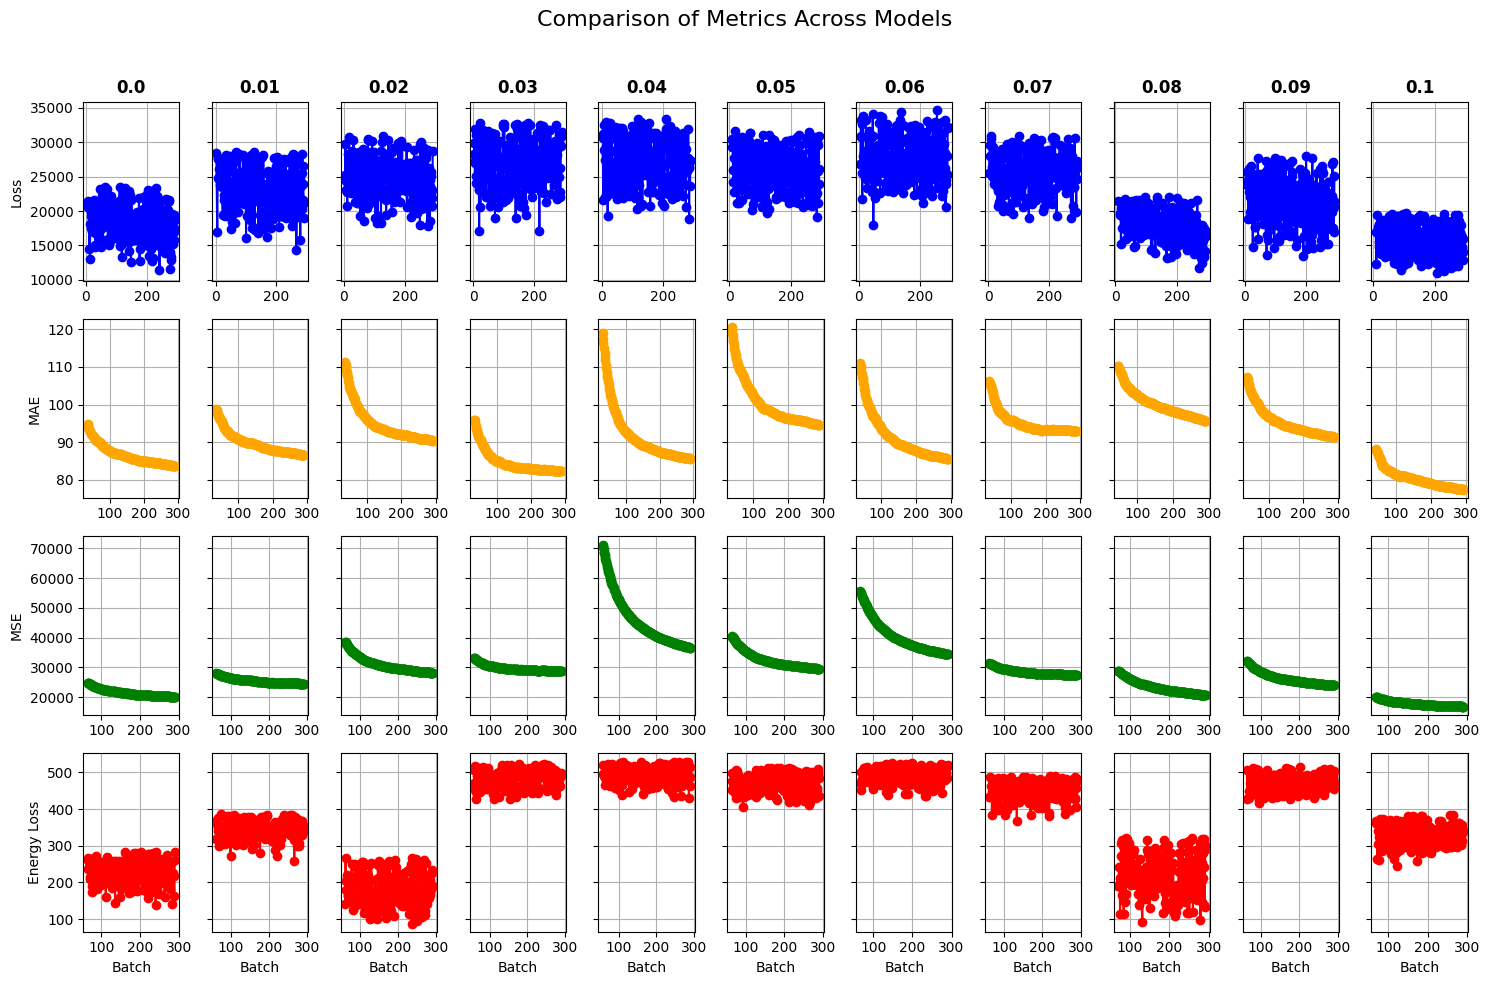

In [24]:
compare_models_metrics(paths, model_labels=lambdas)

In [34]:
df_per_variable=pd.read_csv("/home/alvarovh/code/cse598_climate_proj/results_59inindex/results_0.01/train_variable_metrics_lambda_0.0_datafrac_0.01.csv")

# filter ot variable_name == state_t:
df_per_variable=df_per_variable[df_per_variable["variable_name"]=="state_t"]
df_per_variable


epoch  batch variable_name         mae            mse
0         1      1       state_t  500.544067  251658.562500
12        1      2       state_t  115.505280   13552.972656
24        1      3       state_t  216.712189   47095.593750
36        1      4       state_t  257.968719   66686.718750
48        1      5       state_t  215.274017   46544.617188
...     ...    ...           ...         ...            ...
3432      1    287       state_t  135.623856   18644.558594
3444      1    288       state_t  113.135895   12987.103516
3456      1    289       state_t  148.458771   22182.601562
3468      1    290       state_t  179.515457   32342.464844
3480      1    291       state_t  166.258499   27785.912109

[291 rows x 5 columns]